# Analisis descriptivo

---

Analisis descriptivo de variables de interes para mirar su comportamiento

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import cv2
import json
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/Shared drives/Tecnicas de aprendizaje estadistico/Trabajo 1")

Mounted at /content/drive


## Lectura de datos 

In [15]:
data = pd.read_csv('datasets/formatted_data.csv', low_memory=False)
df = data.copy() 

In [16]:
with open('datasets/metadata.json', 'r') as outfile:
  metadata =  json.loads(json.load(outfile))
  md = metadata

## Contexto




### Encuesta Nacional de Calidad de Vida

Su objetivo es obtener información que permita analizar y realizar comparaciones de las condiciones socioeconómicas de los hogares colombianos, las cuales posibiliten hacer seguimiento a las variables necesarias para el
diseño e implementación de políticas públicas.

Para un contexto más profundo [Encuesta Nacional de Calidad de Vida - ECV 2020](https://microdatos.dane.gov.co/index.php/catalog/718/study-description), donde se ofrece una descripción a profundidad del estudio

In [17]:
df.sample(n=5)

,P1_DEPARTAMENTO,CLASE,FEX_C,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,P2102,P3155,P3156,P1070,P4005,...,salario,pension,estado_civil_n,tipo_documento_n,grupo_etnico_n,hogar_n,parentesco_jefe_hogar_n,num_orden_n,nacio_donde_vive_n,sexo_n
15140,NaN,NaN,72.324151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,5.0,2.0,6.0,7253240.0,3.0,2.0,1.0,1.0
252809,NaN,NaN,108.323057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,2.0,3.0,6.0,7399248.0,2.0,2.0,1.0,2.0
224843,NaN,NaN,13.531759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,5.0,2.0,6.0,7386074.0,3.0,2.0,1.0,2.0
29695,66.0,1.0,256.780484,1.0,1.0,3.0,2.0,1.0,1.0,1.0,...,0,0,6.0,3.0,6.0,7259072.0,1.0,1.0,2.0,2.0
243369,NaN,NaN,33.547849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,1.0,1.0,7394746.0,3.0,6.0,1.0,2.0


## Cantidad total de encuestados

In [18]:
n = len(data)
print(f"Son un total de {n} encuestados")

Son un total de 267194 encuestados


## Frecuencia  de personas por edad.
Para esta frecuencia es importante entender que:

$$
años\ cumplidos = floor(edad\ persona)
$$

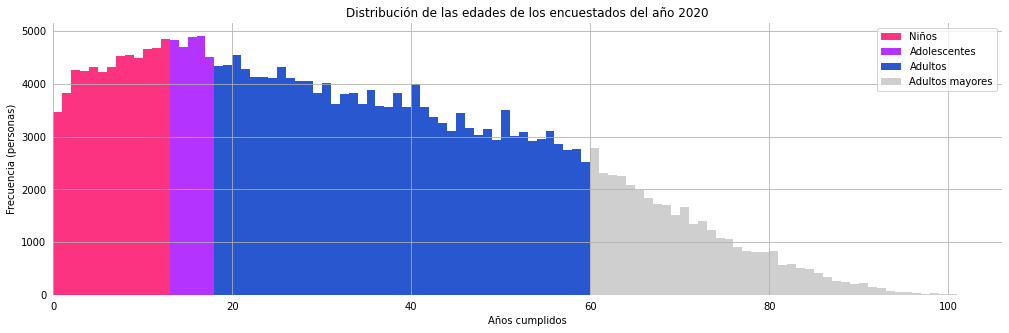

In [19]:
plt.figure(figsize=(17, 5))
plt.title('Distribución de las edades de los encuestados del año 2020')
data[data.años_cumplidos <= 12].años_cumplidos.hist(bins=range(0, 15), color="#fc3380", label="Niños")
data[(data.años_cumplidos <= 17) & (data.años_cumplidos >= 13)].años_cumplidos.hist(bins=range(13, 20), color="#b533ff", label="Adolescentes")
data[(data.años_cumplidos <= 59) & (data.años_cumplidos >= 18)].años_cumplidos.hist(bins=range(18, 65), color="#2957d0", label="Adultos")
data[(data.años_cumplidos >= 60)].años_cumplidos.hist(bins=range(60, 105), color="#cfcfcf", label="Adultos mayores")
plt.box(False)
plt.xlabel('Años cumplidos')
plt.ylabel('Frecuencia (personas)')
plt.tick_params(bottom=False, left=False)
plt.xlim(0, data.años_cumplidos.max())
plt.legend()
plt.show()

La cantidad de encuestados correspondientes a los niños parece ser mucho mayor que la de los adultos mayores o abuelos, sin embargo, es prescindible averiguar si la variable objetivo de satisfacción de vida tiene una respuesta para todos ellos.

## Cantidad de respuestas de satisfacción de vida por categoria de edad.

0 36839 14296 149992


Text(0.5, 1.0, 'Numero de respuestas para la satisfacción de vida por edad')

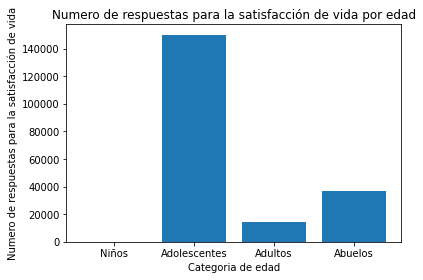

In [20]:
ninios = df[df["años_cumplidos"] <= 12]["satisfaccion_vida"].count()
adultos_mayores = df[df["años_cumplidos"] >= 60]["satisfaccion_vida"].count()
adolescentes = df.loc[(df["años_cumplidos"] >= 13) & (df["años_cumplidos"] <=17)]["satisfaccion_vida"].count()
adultos = df.loc[(df["años_cumplidos"] >= 18) & (df["años_cumplidos"] <=59)]["satisfaccion_vida"].count()
print(ninios, adultos_mayores, adolescentes, adultos)
plt.bar(["Niños", "Adolescentes", "Adultos", "Abuelos"],[ninios, adultos, adolescentes, adultos_mayores] )
plt.xlabel("Categoria de edad")
plt.ylabel("Numero de respuestas para la satisfacción de vida")
plt.title("Numero de respuestas para la satisfacción de vida por edad")

En este caso se puede observar que los niños no responden la variable objetivo de satisfacción de vida, por lo que para que un algoritmo de aprendizaje supervisado funcione, es necesario obtener estas respuestas. Mas adelante en la sección de ingenieria de caracteristicas se planea sustituir estos valores para los niños y asi construir un modelo.

## ¿Cual es en general la satisfacción de vida?

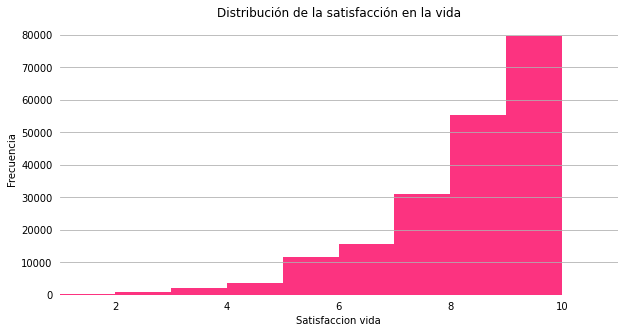

In [22]:
plt.figure(figsize=(10, 5))
plt.title('Distribución de la satisfacción en la vida')
df.satisfaccion_vida.hist(bins=10, color="#fc3380")  # <- cambien el color
plt.box(False)
plt.xlabel('Satisfaccion vida')
plt.ylabel('Frecuencia')
plt.tick_params(bottom=False, left=False)
plt.xlim(1, 11)
plt.grid(axis='x')
plt.show()

Segun se observa en la grafica anterior, gran parte de las personas que responden acerca de su satisfacción de vida consideran que se encuentran en una escala media alta de 7 a 10 puntos. Esto es interesante para un pais como Colombia, en donde las condiciones de pobreza y de violencio son bastante elevadas.

## ¿Cual es la persona con mas edad del conjunto de datos y cual es su nivel de satisfacción con la vida?

In [23]:
df.loc[(df["años_cumplidos"]==df["años_cumplidos"].max()), ["años_cumplidos", "satisfaccion_vida"]]

,años_cumplidos,satisfaccion_vida
61092,106.0,7.0


La persona que mas años tiene en el dataset tiene 106 años y se situa con un nivel de satisfacción de 7 en una escala de 10.

## Correlaciones

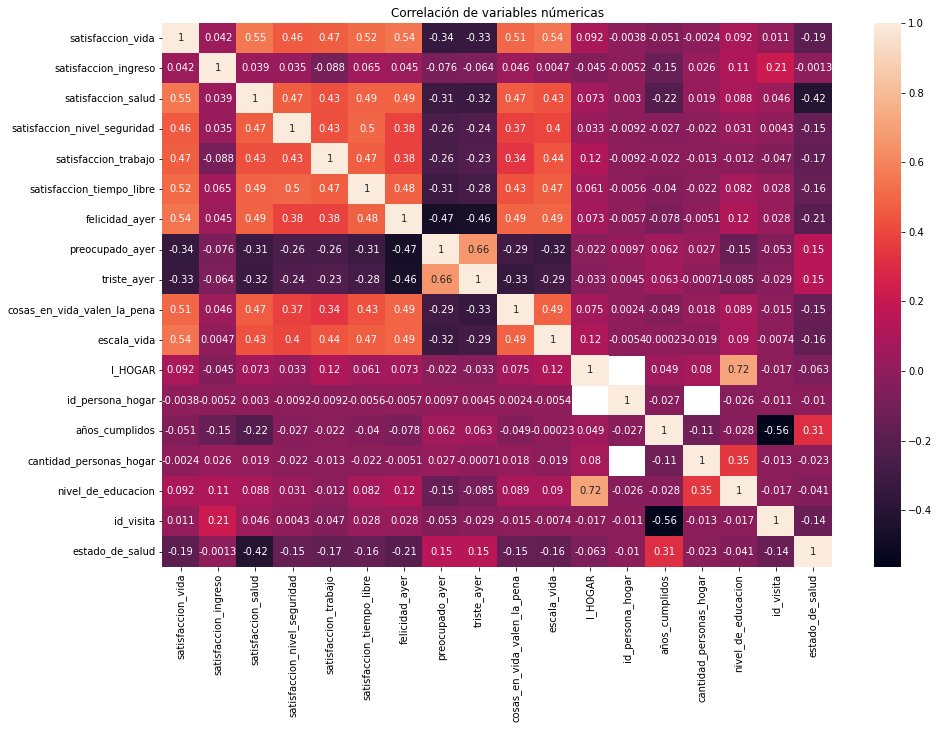

In [26]:
corr_df = df[md['secciones']['satisfaccion']+md['secciones']['basicos']].corr(method='pearson')
plt.figure(figsize=(15, 10))
plt.title('Correlación de variables númericas')
sns.heatmap(corr_df, annot=True)
plt.show()

De la matriz de correlaciones se puede observar que la variable de satisfacción de vida tiene una gran correlación positiva con algunas variables de satisfacción como la satisfacción en salud, el nivel de seguridad y el trabajo. Tambien, se alcanza a observar que algunas variables "negativas" como estar preocupado o triste el dia de ayer, tienen una correlación negativa que puede ser alta para la variable satisfacción de vida. A pesar de que estas variables pueden ser utiles para predecir la satisfacción de vida, no se planea utilizarlas en los modelos predictivos puesto que la idea del trabajo es predecir esta variable con caracteristicas socioeconomicas como temas de vivienda, sector, servicios publicos, ingresos y otras. Unicamente se considera como relevante la variable de satisfacción con el tiempo libre.